In [66]:
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("car.data")
modelData = pd.DataFrame(columns=['buying','maint','doors','persons','lug_boot','safety'])

le = preprocessing.LabelEncoder()

modelData['buying'] = le.fit_transform(data['buying'])
modelData['maint'] = le.fit_transform(data['maint'])
modelData['doors'] = le.fit_transform(data['doors'])
modelData['persons'] = le.fit_transform(data['persons'])
modelData['lug_boot'] = le.fit_transform(data['lug_boot'])
modelData['safety'] = le.fit_transform(data['safety'])
Y = le.fit_transform(data['class'])

In [140]:
X = list(zip(modelData['buying'],modelData['maint'],modelData['doors'],modelData['persons'],modelData['lug_boot'],modelData['safety']))
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
accuracy = model.score(x_test,y_test)
print(accuracy)

0.9132947976878613


In [68]:
predicted = model.predict(x_test)
names = ["unacceptable", "acceptable", "good", "very good"]

for x in range(len(predicted)):
    print("Data: ", x_test[x],"Predicted: ", names[predicted[x]],"Actual: ", names[y_test[x]])

[(2, 1, 0, 2, 1, 0), (3, 0, 0, 0, 2, 1), (0, 3, 3, 2, 1, 2), (2, 3, 1, 2, 1, 2), (0, 0, 2, 0, 1, 0), (2, 2, 2, 0, 2, 0), (1, 3, 0, 1, 0, 2), (1, 2, 1, 0, 0, 0), (3, 1, 2, 0, 0, 0), (0, 2, 0, 1, 1, 0), (3, 1, 1, 0, 2, 1), (2, 2, 2, 0, 0, 1), (1, 3, 3, 0, 1, 2), (1, 3, 2, 2, 0, 1), (3, 3, 0, 2, 2, 2), (1, 3, 2, 0, 0, 2), (0, 3, 2, 2, 0, 1), (3, 0, 1, 1, 1, 2), (2, 2, 3, 1, 0, 0), (2, 1, 0, 2, 0, 1), (3, 0, 2, 1, 2, 2), (2, 1, 2, 2, 2, 2), (1, 1, 3, 1, 2, 1), (1, 0, 2, 2, 2, 2), (0, 2, 0, 1, 0, 1), (1, 0, 1, 0, 0, 2), (3, 1, 3, 1, 1, 0), (3, 1, 1, 2, 0, 2), (2, 1, 2, 1, 0, 0), (0, 0, 3, 1, 1, 1), (0, 1, 3, 2, 2, 0), (2, 2, 1, 2, 2, 0), (1, 3, 1, 2, 1, 0), (2, 3, 1, 0, 0, 2), (2, 0, 3, 1, 0, 2), (1, 2, 0, 2, 1, 0), (2, 2, 3, 2, 0, 2), (3, 1, 1, 0, 1, 2), (1, 0, 1, 2, 1, 2), (0, 1, 2, 0, 1, 1), (1, 3, 2, 2, 1, 2), (0, 2, 3, 0, 0, 0), (1, 1, 1, 1, 2, 2), (0, 0, 0, 1, 1, 0), (2, 0, 3, 2, 1, 2), (2, 2, 0, 2, 1, 2), (3, 3, 1, 2, 0, 2), (0, 3, 3, 0, 1, 0), (0, 3, 2, 1, 1, 2), (0, 2, 0, 1, 1, 2),

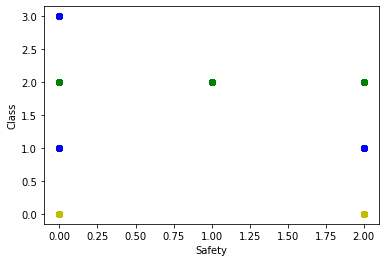

In [69]:
namesColor = ["ro", "yo", "bo", "go"]
holder = 0
counter = 0
previousCounter = 0
holder = 0

for x in range(len(modelData['safety'])):
  for y in range(4):
    if counter > previousCounter:
      previousCounter = counter
      holder = y
    if model.predict([(modelData['buying'][x],modelData['maint'][x],modelData['doors'][x],modelData['persons'][x],modelData['lug_boot'][x],modelData['safety'][x])])[0]==y:
      counter += 1
  plt.plot(modelData['safety'][x], Y[x], namesColor[holder])
  plt.xlabel("Safety")
  plt.ylabel("Class")

In [70]:
#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#lug_boot: small, med, big.
#safety: low, med, high.
print(names[model.predict([(3,3,1,0,1,2)])[0]])

good
